In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [105]:
#importing datasets
linear_data = pd.read_csv("../data/modeling/linear_regression.csv",index_col = 0)
tree_data = pd.read_csv('../data/modeling/decision_tree.csv', index_col = 0)
lasso_data = pd.read_csv('../data/modeling/lasso_regression.csv', index_col = 0)
targets = pd.read_csv('../data/modeling/targets.csv', index_col = 0)
colinear = pd.read_csv('../data/modeling/co_linear.csv', index_col = 0)

In [106]:
tree_data.drop(columns = 'index', inplace = True)
lasso_data.drop(columns = targets.columns, inplace = True)
pd.merge(lasso_data, colinear)

,Median Sales Price,PercentShortTermRentals,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,...,prop_Private room in guest suite,prop_Private room in guesthouse,prop_Private room in hostel,prop_Private room in house,prop_Private room in loft,prop_Private room in resort,prop_Private room in townhouse,prop_Room in aparthotel,prop_Room in boutique hotel,prop_Tiny house
0,134250.0,4.626335,100.0,100.0,1,1,1,8,2.000000,4.0,...,0,0,0,0,0,0,0,0,0,0
1,134250.0,4.626335,96.0,98.0,0,1,1,6,2.500000,3.0,...,0,0,0,0,0,0,0,0,0,0
2,134250.0,4.626335,100.0,84.0,1,1,1,4,1.000000,2.0,...,0,0,0,0,0,0,0,0,0,0
3,134250.0,4.626335,95.0,99.0,0,1,1,6,2.500000,3.0,...,0,0,0,0,0,0,0,0,0,0
4,134250.0,4.626335,100.0,100.0,0,1,1,8,2.000000,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,314500.0,2.684564,100.0,94.0,0,1,1,6,2.500000,3.0,...,0,0,0,0,0,0,0,0,0,0
2232,314500.0,2.684564,100.0,94.0,0,1,1,6,2.500000,3.0,...,0,0,0,0,0,0,0,0,0,0
2233,314500.0,2.684564,100.0,94.0,0,1,1,4,2.500000,2.0,...,0,0,0,0,0,0,0,0,0,0
2234,314500.0,2.684564,98.0,100.0,0,1,1,8,2.000000,2.0,...,0,0,0,0,0,0,0,0,1,0


# Creating a Hold Out Set

Splitting the data first ensures the same training and test sets are used for all the models. 

In [107]:
#checks to make sure data is still indexed the same by taking a 
#column with continuous values and making sure it is the same across least manipulated and most manipulated dataset. 
print((linear_data["reviews_per_month"]==tree_data["reviews_per_month"]).unique())

[ True]


In [151]:
y = np.sqrt(targets['price']) #chooses target variable
test_size = .3#chooses test size

X_train_tree, X_test_tree, y_train, y_test = train_test_split(tree_data, y, test_size = test_size)#splits data for decision tree model
def split(data):#takes in data a returns split data with the same train and test data with the same index as original split
    train = data.iloc[list(X_train_tree.index)]
    test = data.iloc[list(X_test_tree.index)]
    return train, test

X_train_lin, X_test_lin = split(linear_data)#splits linear data
X_train_lasso, X_test_lasso = split(lasso_data)#splits lasso data

In [109]:
#makes sure everything is indexed the same.
list(X_train_tree.index)==list(X_train_lin.index)==list(X_train_lasso.index)==list(y_train.index)
        

True

In [110]:
print(y[:5])

0    4.969813
1    4.553877
2    4.254619
3    4.499810
4    4.488636
Name: price, dtype: float64


# Linear Regression Model
The first model I'll try is mulitple linear regression from sklearn's linear regression. For this model, I'm only using the 20 features most correlated to price per person. Features with high colinearity were also removed from this data. 
Linear regression requires that data be standardized 

In [111]:
scaler = MinMaxScaler()


X_train_lin = scaler.fit_transform(X_train_lin)#fits on training set then transforms training set

X_test_lin = scaler.transform(X_test_lin)#transforms test set using fit from training set. This keeps information from the test set from leaking into the training data.

In [112]:
lin = LinearRegression()
cv = cross_val_score(lin, X_train_lin, y_train, cv = 10)
cv.mean()

0.551365959933636

# Lasso Regression

In [113]:
lasso = Lasso()
params = {'alpha': [.1,.2,.3,.4,.5]+list(range(1,50))}
gridcv = GridSearchCV(lasso, param_grid=params, cv = 10)
gridcv.fit(X_train_lasso, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                   20, 21, 22, 23, 24, 25, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [114]:
print(gridcv.best_params_)
print(gridcv.best_score_)

{'alpha': 0.1}
0.5274461765641679


In [115]:
lasso = Lasso(alpha = .1)
lasso.fit(X_train_lasso,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
y_pred = lasso.predict(X_test_lasso)

In [117]:
r2_score(y_test, y_pred)

0.4915639254109174

In [118]:
results=y_test.to_frame().reset_index()
results['predicted_price']=pd.Series(y_pred)
results['predicted_price']=np.exp(results.predicted_price)
results['price']=np.exp(results.price)
results['difference'] =results.predicted_price-results.price
results.head()

,index,price,predicted_price,difference
0,855,125.00,68.920470,-56.079530
1,334,74.00,84.406131,10.406131
2,62,38.14,56.259545,18.119545
3,163,206.00,156.782777,-49.217223
4,947,72.00,80.385728,8.385728


<AxesSubplot:xlabel='price', ylabel='difference'>

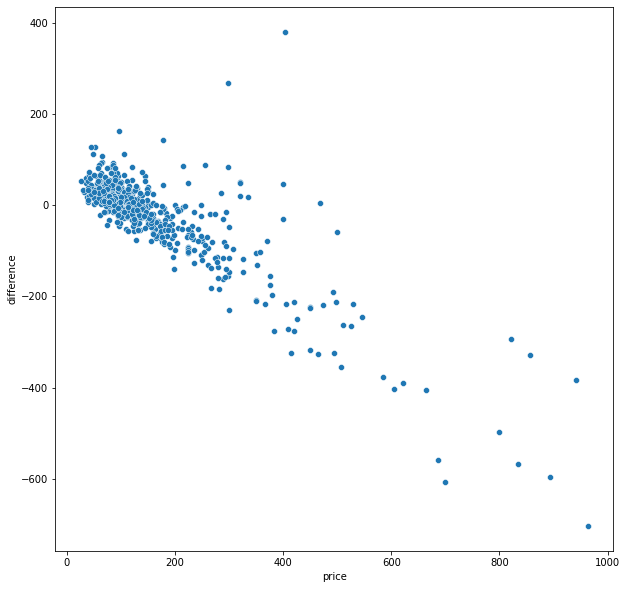

In [119]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data = results, x='price', y='difference')

<AxesSubplot:xlabel='price', ylabel='difference'>

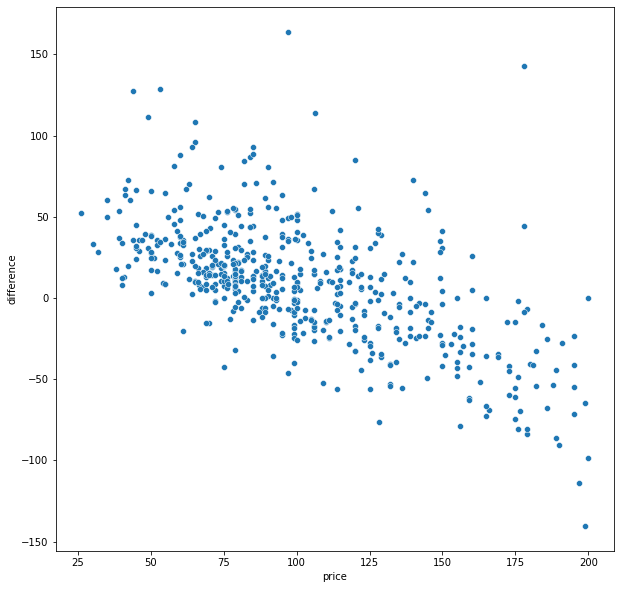

In [120]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data = results[results['price']<200],x='price',y='difference')

In [121]:
from sklearn.dummy import DummyRegressor

In [122]:
dummy = DummyRegressor()
dummy.fit(X_train_lasso, y_train)
dummy_y = dummy.predict(X_test_lasso)
r2_score(y_test, dummy_y)

-0.0010743429751705058

# Random Forest

In [152]:
X = lasso_data
X_train, x_test = split(X)

In [153]:
rf = RandomForestRegressor()
params = {'n_estimators':[1000]}
gridcv = GridSearchCV(rf, param_grid=params, cv = 5)
gridcv.fit(X, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [154]:
gridcv.best_score_

0.6687372077181586

In [155]:
rf=RandomForestRegressor(n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [156]:
y_pred = rf.predict(x_test)

In [157]:
r2_score(y_test, y_pred)

0.6718248317643917

In [163]:
np.sqrt(np.mean((((y_pred)**2)-((y_test)**2))**2))

71.53441297272705

In [148]:
results=y_test.to_frame().reset_index()
results['predicted_price']=pd.Series(y_pred)
results['predicted_price']=np.exp(results.predicted_price)
results['price']=np.exp(results.price)
results['residual'] =results.predicted_price-results.price
results.head()

,index,price,predicted_price,residual
0,855,125.00,113.263950,-11.736050
1,334,74.00,83.873372,9.873372
2,62,38.14,40.995870,2.855870
3,163,206.00,161.585061,-44.414939
4,947,72.00,70.303547,-1.696453


<AxesSubplot:xlabel='predicted_price', ylabel='residual'>

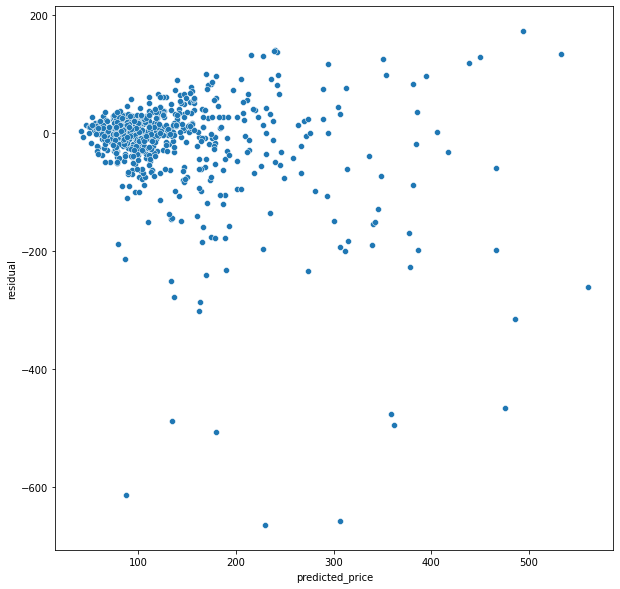

In [149]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = results, x='predicted_price', y='residual')

In [150]:
## D

In [141]:
importances = dict(zip(X_train,rf.feature_importances_))
importances =pd.DataFrame.from_dict(importances, orient ='index')
importances= importances.sort_values(by=0, ascending = False)
importances.head(20)

,0
bathrooms_text,0.402453
bedrooms,0.089978
reviews_per_month,0.084622
Median Sales Price,0.026984
calculated_host_listings_count,0.026873
days_active,0.022650
availability_365,0.019963
beds,0.018869
PercentShortTermRentals,0.018010
number_of_reviews_l30d,0.016212


## Random Forest after removing outliers

In [167]:
med = np.median(targets.price)
std_p= np.std(targets.price)
outlier = (3*std_p) + med

In [168]:
no_outliers = lasso_data
no_outliers["price"] = targets["price"]
no_outliers=no_outliers[no_outliers['price']<outlier]

In [171]:
print('This removed ' + str(lasso_data.shape[0] - no_outliers.shape[0]) +' rows')

This removed 65 rows


In [202]:
X = no_outliers
y = np.log(no_outliers.price)

In [203]:
X = X.drop(columns = 'price')

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [227]:
params = {'max_depth':range(10,25)}
gridcv = GridSearchCV(rf, param_grid=params, cv = 10)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=19,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [222]:
gridcv.best_params_

{'max_depth': 19}

In [223]:
rf=RandomForestRegressor(max_depth = 19, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [224]:
rf.score(X_train, y_train)

0.9513721920750219

In [225]:
y_pred = rf.predict(X_test)

In [226]:
rf.score(X_test, y_test)

0.6470103480907922

In [192]:
results=y_test.to_frame().reset_index()
results['predicted_price']=pd.Series(y_pred)
results['predicted_price']=results.predicted_price
results['price']=results.price
results['residual'] =results.predicted_price-results.price
results.head()

,index,price,predicted_price,residual
0,744,108.0,106.37761,-1.62239
1,1584,72.0,57.08913,-14.91087
2,2104,157.0,91.19168,-65.80832
3,1909,305.0,167.27786,-137.72214
4,1299,250.0,207.97842,-42.02158


0       144.00
1        95.00
2        70.43
3        90.00
4        89.00
         ...  
2217    151.00
2218    150.00
2219    103.00
2220    249.00
2221     45.00
Name: price, Length: 2222, dtype: float64

In [81]:
x = x_test.iloc[12]
x = x.to_frame()
x  = x.transpose()
predictions = {}
for i in range (1,900):
    x.price = i
    a = rf.predict(x)
    predictions[i]=a 

In [82]:
x = pd.DataFrame.from_dict(predictions)

In [83]:
x =x.transpose().reset_index()

In [84]:
x[0]=np.exp(x[0])

In [85]:
x

,index,0
0,1,36.439338
1,2,36.439338
2,3,36.439338
3,4,36.439338
4,5,36.439338
...,...,...
894,895,36.439338
895,896,36.439338
896,897,36.439338
897,898,36.439338


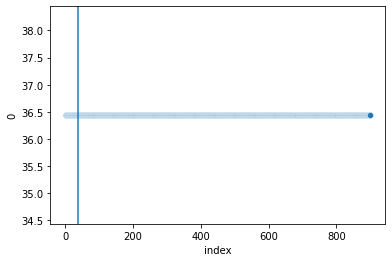

In [86]:
import seaborn as sns
sns.scatterplot(data = x, x = 'index', y = x[0])
plt.axvline(max(x[0]))